# K-NN (Caravan Data)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

## 1. Load DataSets

In [2]:
caravan_data = pd.read_csv('./data/Caravan.csv', index_col=0)
caravan_data.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No


In [3]:
caravan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [6]:
caravan_data['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

## 2. PreProcessing

In [29]:
# 데이터 불균형 처리
UNDER_SAMPLING_N = 400
under_sampling_caravan_data = pd.concat([caravan_data[caravan_data['Purchase']=='No'].sample(n=UNDER_SAMPLING_N),
                                         caravan_data[caravan_data['Purchase']=='Yes']])
under_sampling_caravan_data.shape

(748, 86)

In [31]:
# X, y값 분할
X = under_sampling_caravan_data[under_sampling_caravan_data.columns.difference(['Purchase'])]
y = under_sampling_caravan_data['Purchase']

print(X.shape)
print(y.shape)

(748, 85)
(748,)


----

**TIP)** *K-NN 알고리즘의 변수 값 정규화*    
    
K-NN 알고리즘은 거리 기반의 모델이므로 구현 시에 변수 값에 범위를 재조정 해줄 필요가 있다. 거리를 다루는 만큼 변수 값의 범위를 재조정 해주어야 변수의 중요도를 고르게 해석 할 수 있기 때문이다. (이는, K-Means 같은 거리 기반의 알고리즘에 모두 통용되는 부분이다.)

----

In [32]:
# X값 정규화
std_scaler = preprocessing.StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-0.11035678, -0.06345743,  0.63852082, ...,  1.08162463,
        -0.05125627, -0.03658809],
       [-0.11035678, -0.06345743,  0.63852082, ...,  1.08162463,
        -0.05125627, -0.03658809],
       [-0.11035678, -0.06345743, -1.12389089, ..., -0.94354489,
        -0.05125627, -0.03658809],
       ...,
       [-0.11035678, -0.06345743,  0.63852082, ...,  1.08162463,
        -0.05125627, -0.03658809],
       [-0.11035678, -0.06345743,  0.63852082, ..., -0.94354489,
        -0.05125627, -0.03658809],
       [-0.11035678, -0.06345743,  0.63852082, ...,  1.08162463,
        -0.05125627, -0.03658809]])

In [35]:
# 학습 데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)

(598, 85)
(150, 85)


## 3. K-NN (K-Nearest Neighbor)

참고자료: https://ratsgo.github.io/machine%20learning/2017/04/17/KNN

K-NN 알고리즘은 새로운 데이터로부터 거리가 가까운 K개의 다른 데이터의 라벨을 참고하여 K개의 데이터 중 가장 빈도 수가높게 나온 데이터의 라벨로 분류하는 알고리즘이다.    
K-NN은 학습이라고 할 만한 절차가 없으며, 별도로 모델을 구축하지도 않는다. 새로운 데이터가 입력 된 이후 그제야 기존 데이터 사이의 거리를 재서 이웃을 뽑기 때문에 게으른 모델(Lazy Model 또는 Instance-bases Learning)이라고 부르기도 한다.

<img src='./image/k-nn.png' width=300 height=300>

K-NN은 노이즈의 영향을 크게 받지 않고 학습데이터 수가 많다면 꽤 효과적인 알고리즘으로 이며 마할라노비스를 사용해 데이터의 분산을 고려 할 경우 매우 강건한(robust)한 방법론으로 알려져있다. 때문에 여러 기업의 현업에서도 K-NN은 두루 사용되는 편이다.    
하지만, K값을 연구자가 임의로 선정해야 하는 점과 관측치와 각각의 학습 데이터 사이의 거리를 전부 측정해야 하므로 계산이 오래 걸리는 한계점 등은 존재한다. 최근에는 Locality Sensitive Hashing, Network based Indexer, Optimized product quabtization 등 K-NN의 복잡성을 줄이려는 시도가 여럿 제안되었다.

----

**TIP)** *K-NN의 거리측정 방법*   
1. Euclidean Distance   
가장 기본적으로 흔히 사용되는 거리 척도로써, 관측치의 최단거리를 의미   
$X = (x_{1}, x_{2}, ..., x_{n})$    
$Y = (y_{1}, y_{2}, ..., y_{n})$    
$d_{Euclidean} = \sqrt{(x_{1} - y_{1})^{2} + ... + (x_{n} - y_{n})^{2}} = \sqrt{\sum_{i=1}^{n}(x_{i} - y_{i})^{2}}$   

2. Manhattan Distance    
직교 좌표계에서 좌표축 방향으로만 이동할 경유애 계산되는 거리    
$d_{Manhattan} = \sum_{i=1}^{n}\vert x_{i} - y_{i} \vert$    

3. Mahalanobis Distance    
변수 내 분산, 변수 간 공분산을 모두 반영하여 거리를 계산하는 방식으로, 변수 간 상관관계를 고려한 거리 지표    
참고자료 1): https://darkpgmr.tistory.com/41 (마할라노비스 거리의 의미)  
참고자료 2): https://gaussian37.github.io/ml-concept-mahalanobis_distance (마할라노비스 거리의 계산)    
$d_{Mahalanobis(X, Y)} = \sqrt{(X - Y)^{T}\sum^{-1}(X - Y)}$ &nbsp; ($\sum^{-1}$ : 공분산의 역행렬)    
    
4. Correlation Distance    
pearson correlation을 거리 척도로 직접 사용하며, 데이터 전체의 경향성을 비교하기 위한 척도이므로 두 개 데이터 패턴의 유사도를 반영 할 수 있다.   
    
5. Rank Correlation Distance     
Spearman Rank Correlation을 거리 척도로 직접 사용라는 점에서만 Correlation Distance와 차이를 가질 뿐 나머지 부분은 동일하다.

----

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
# 정확도 측정
print('Data Set Accuracy Result: ', knn.score(X_test, y_test))

Data Set Accuracy Result:  0.58


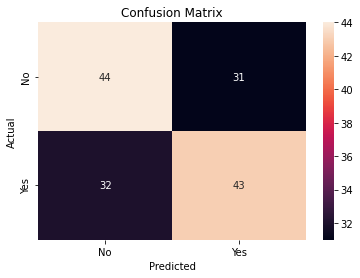


[Confusion Report]

               precision    recall  f1-score   support

          No       0.58      0.59      0.58        75
         Yes       0.58      0.57      0.58        75

    accuracy                           0.58       150
   macro avg       0.58      0.58      0.58       150
weighted avg       0.58      0.58      0.58       150



In [45]:
def get_confusion_mt(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    confusion_mt = pd.crosstab(_y_test.values.ravel(), y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
    return confusion_mt

def get_confusion_report(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    return classification_report(_y_test, y_pred)

# confusion matrix 산출 
confusion_mt = get_confusion_mt(knn, X_test, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(knn, X_test, y_test))

----

**TIP)** *K값의 선택*    
    
K가 작을 경우 지나치게 데이터의 지역적 특성이 반영되며, 너무 클 경우 모델이 과하게 정규화 되는 경향이 있다. 

<img src='./image/k_select.png' width=500 height=300>

----

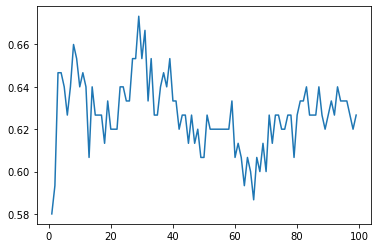

In [63]:
# k-값을 늘려가며 정확도 비교

acc_ls = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 정확도 측정
    acc = knn.score(X_test, y_test)
    acc_ls.append(acc)

sns.lineplot()
plt.plot(np.arange(1, 100), acc_ls)
plt.show()

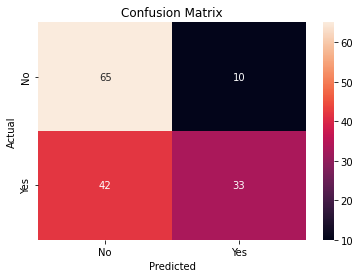


[Confusion Report]

               precision    recall  f1-score   support

          No       0.61      0.87      0.71        75
         Yes       0.77      0.44      0.56        75

    accuracy                           0.65       150
   macro avg       0.69      0.65      0.64       150
weighted avg       0.69      0.65      0.64       150



In [64]:
# best K에서의 측정지표 결과

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

def get_confusion_mt(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    confusion_mt = pd.crosstab(_y_test.values.ravel(), y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
    return confusion_mt

def get_confusion_report(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    return classification_report(_y_test, y_pred)

# confusion matrix 산출 
confusion_mt = get_confusion_mt(knn, X_test, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(knn, X_test, y_test))